In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Load Data

In [18]:
import csv
import cv2
import numpy as np


def process_image(image):
    image = np.asarray(image)
    
lines = []
with open('../data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
correction = 0.2

for row in lines[1:]:
    steering_center = float(row[3])
    source_path = line[0]

    steering_left = steering_center + correction
    steering_right = steering_center - correction

    filename = source_path.split('/')[-1]
    current_path = '../data/IMG/' + filename

    img_center = process_image(Image.open(path + row[0]))
    img_left = process_image(Image.open(path + row[1]))
    img_right = process_image(Image.open(path + row[2]))

X_train = np.array(images)
y_train = np.array(measurements)

NameError: name 'process_image' is not defined

In [17]:
print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is:", y_train.shape)

Shape of X_train is: (16072, 160, 320, 3)
Shape of y_train is: (16072,)


# Preprocess Data

# Train Model

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Convolution2D
from keras.layers import Cropping2D
from keras.models import Model
import matplotlib.pyplot as plt

model = Sequential()
model.add(Cropping2D(cropping=((70,25), (0,0)), input_shape=(160,320,3)))
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(65, 320, 3)))
model.add(Flatten(input_shape=(160, 320, 3)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True)

model.save('model.h5')

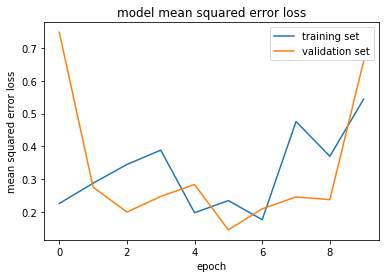

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()